In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set()

In [4]:
data = pd.read_csv('911.csv')

In [5]:
data.head(8)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1


In [6]:
data.shape

(423909, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [8]:
columns_name=list(data.columns)

In [9]:
columns_name

['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e']

# Separating call type from the data.

In [10]:
data.title.head(10)

0         EMS: BACK PAINS/INJURY
1        EMS: DIABETIC EMERGENCY
2            Fire: GAS-ODOR/LEAK
3         EMS: CARDIAC EMERGENCY
4                 EMS: DIZZINESS
5               EMS: HEAD INJURY
6           EMS: NAUSEA/VOMITING
7     EMS: RESPIRATORY EMERGENCY
8          EMS: SYNCOPAL EPISODE
9    Traffic: VEHICLE ACCIDENT -
Name: title, dtype: object

In [11]:
def call_type_separator(x):
    x=x.split(":")
    return x[0]
    
                       

In [12]:
data['call_type']=data['title'].apply(call_type_separator)

In [13]:
data.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic


In [14]:
data['call_type'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [15]:
data['call_type'].value_counts().head()

EMS        208676
Traffic    151458
Fire        63775
Name: call_type, dtype: int64

# Converting timestamp to pandas datetime.

In [16]:
data['timeStamp']=pd.to_datetime(data['timeStamp'],infer_datetime_format=True)

In [17]:
data['timeStamp'].head()

0   2015-12-10 17:10:52
1   2015-12-10 17:29:21
2   2015-12-10 14:39:21
3   2015-12-10 16:47:36
4   2015-12-10 16:56:52
Name: timeStamp, dtype: datetime64[ns]

# Extracting year, month_name, day_name, hour of the day from timestamp column

In [18]:
import datetime as dt

In [19]:
data['year']=data['timeStamp'].dt.year

In [20]:
data['month']=data['timeStamp'].dt.month_name()

In [21]:
data['day']=data['timeStamp'].dt.day_name()

In [22]:
data['hour']=data['timeStamp'].dt.hour

In [23]:
data.head(8)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,year,month,day,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,Thursday,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,Thursday,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015,December,Thursday,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,December,Thursday,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,December,Thursday,16
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,2015,December,Thursday,15
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,2015,December,Thursday,16
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,2015,December,Thursday,16


In [24]:
data["month"].head()

0    December
1    December
2    December
3    December
4    December
Name: month, dtype: object

# emergency....

In [25]:
def emergency_type_separator(x):
    x=x.split(":")
    x=x[1]
    return x

In [26]:
data['emergency_type']=data["title"].apply(emergency_type_separator)

In [27]:
data['emergency_type'].head()

0      BACK PAINS/INJURY
1     DIABETIC EMERGENCY
2          GAS-ODOR/LEAK
3      CARDIAC EMERGENCY
4              DIZZINESS
Name: emergency_type, dtype: object

In [28]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,year,month,day,hour,emergency_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,Thursday,17,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,Thursday,17,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015,December,Thursday,14,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,December,Thursday,16,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,December,Thursday,16,DIZZINESS


# Visualizing data with different parameters.

In [29]:
data.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,year,month,day,hour,emergency_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,Thursday,17,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,Thursday,17,DIABETIC EMERGENCY


In [30]:
data.month.head()

0    December
1    December
2    December
3    December
4    December
Name: month, dtype: object

# Types of calls

In [31]:
call_types = data['call_type'].value_counts()
call_types

EMS        208676
Traffic    151458
Fire        63775
Name: call_type, dtype: int64

In [32]:
from decimal import Decimal

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

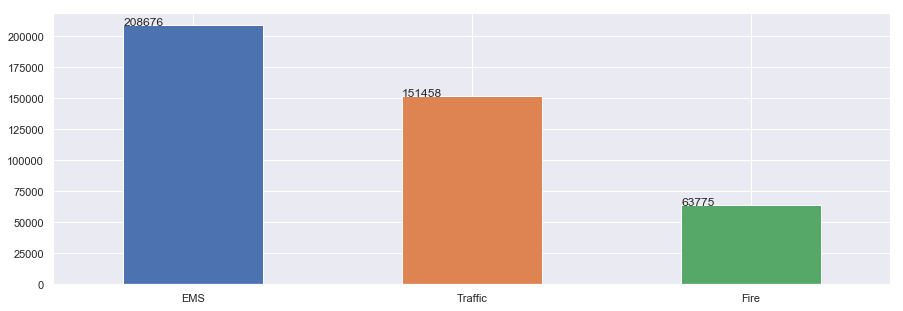

In [33]:
plt.figure(figsize=(15, 5))
ax = call_types.plot.bar()
for p in ax.patches:
    ax.annotate(Decimal(str(p.get_height())), (p.get_x(), p.get_height()))
plt.xticks(rotation=0)

## Types of calls in hour of the day 

In [34]:
hours_data = data.groupby(['hour','call_type'])['call_type'].count()

In [35]:
hours_data.head()

hour  call_type
0     EMS          5263
      Fire         1341
      Traffic      2046
1     EMS          4711
      Fire         1104
Name: call_type, dtype: int64

In [36]:
hour_data_percentage=hours_data.groupby(level=0).apply(lambda x: round(100*x/float(x.sum())))

In [37]:
hours_data_percentage=hour_data_percentage.reindex(['EMS','Traffic','Fire'],level=1)

In [38]:
hours_data_percentage.head()

hour  call_type
0     EMS          61.0
      Traffic      24.0
      Fire         16.0
1     EMS          64.0
      Traffic      21.0
Name: call_type, dtype: float64

NameError: name 'font' is not defined

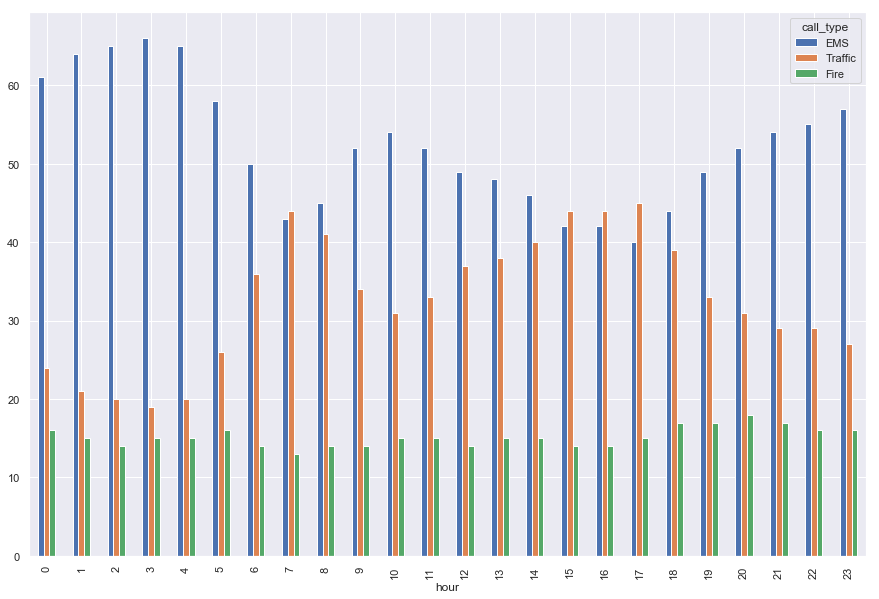

In [39]:
sns.set(rc={"figure.figsize":(15,10)})
hours_data_percentage.unstack().plot(kind='bar')
plt.xlabel('Hours',fontdict=font)
plt.ylabel("percentage",fontdict=font)
plt.xticks(rotation=0)
plt.title("Calls/Hours",fontdict=font)

## Types of calls in day

In [40]:
days_data=data.groupby(['day','call_type'])['call_type'].count()
days_data.head()

day     call_type
Friday  EMS          31010
        Fire          9683
        Traffic      25058
Monday  EMS          30431
        Fire          9292
Name: call_type, dtype: int64

In [41]:
days_data_percentage=days_data.groupby(level=0).apply(lambda x: (100*x/float(x.sum())))

In [42]:
days_data_percentage.head()

day     call_type
Friday  EMS          47.162781
        Fire         14.726772
        Traffic      38.110447
Monday  EMS          49.628168
        Fire         15.153788
Name: call_type, dtype: float64

In [43]:
# day_order=[12,13,14,15,16,17,18,19,20,21,22,23,24,1,2,3,4,5,6,7,8,9,10,11,12]

In [44]:
# days_data_percentage=days_data_percentage.reindex(day_order,level=0)

In [45]:
days_data_percentage=days_data_percentage.reindex(["EMS","Traffic","Fire"],level=1)

In [46]:
days_data_percentage.head()

day     call_type
Friday  EMS          47.162781
        Traffic      38.110447
        Fire         14.726772
Monday  EMS          49.628168
        Traffic      35.218044
Name: call_type, dtype: float64

NameError: name 'font' is not defined

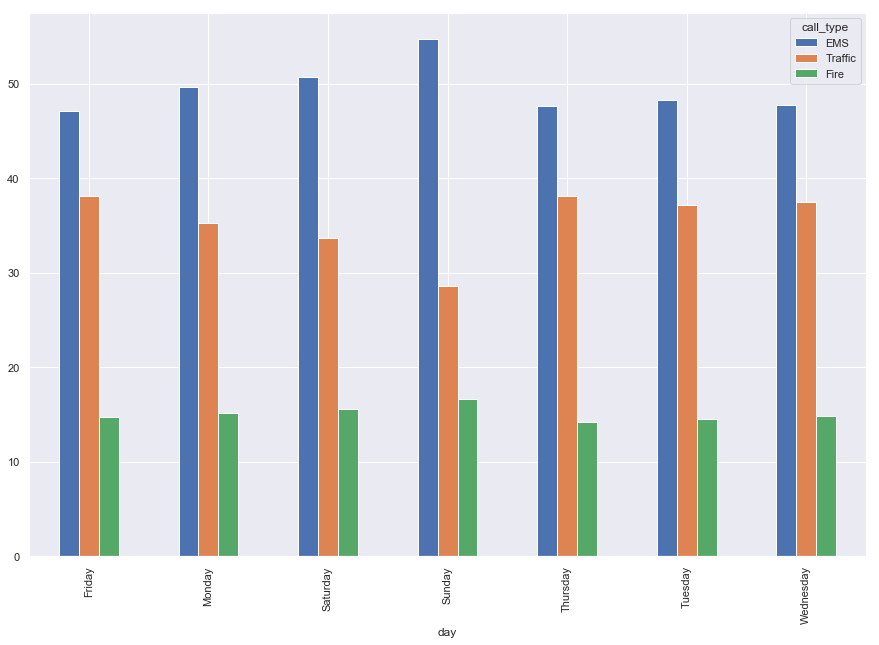

In [47]:
sns.set(rc={'figure.figsize':(15,10)})
days_data_percentage.unstack().plot(kind='bar')
plt.xlabel('Name of the day',fontdict=font)
plt.ylabel('percentage of calls',fontdict=font)
plt.xticks(rotation=0)
plt.title('calls/days',fontdict=font)

## Types Calls in months

In [ ]:
data.info()

In [48]:
calls_data = data.groupby(['month','call_type'])['call_type'].count()

In [49]:
calls_data.head()

month   call_type
April   EMS          17255
        Fire          4983
        Traffic      11345
August  EMS          17965
        Fire          5717
Name: call_type, dtype: int64

In [50]:
percentage=calls_data.groupby(level=0).apply(lambda x: round(100*x/float(x.sum())))

In [51]:
percentage.head()

month   call_type
April   EMS          51.0
        Fire         15.0
        Traffic      34.0
August  EMS          50.0
        Fire         16.0
Name: call_type, dtype: float64

In [52]:
font={
    "size":'x-large',
    "weight":'bold'
    
}

In [53]:
month_order=['January','february','March','April','May','June','July','August','September','October','November','December' ]

In [54]:
percentage=percentage.reindex(month_order, level=0)

In [55]:
percentage=percentage.reindex(['EMS','Traffic','Fire'],level=1)

In [56]:
percentage.head()

month    call_type
January  EMS          49.0
         Traffic      36.0
         Fire         15.0
March    EMS          47.0
         Traffic      37.0
Name: call_type, dtype: float64

Text(0.5, 1.0, 'calls/month')

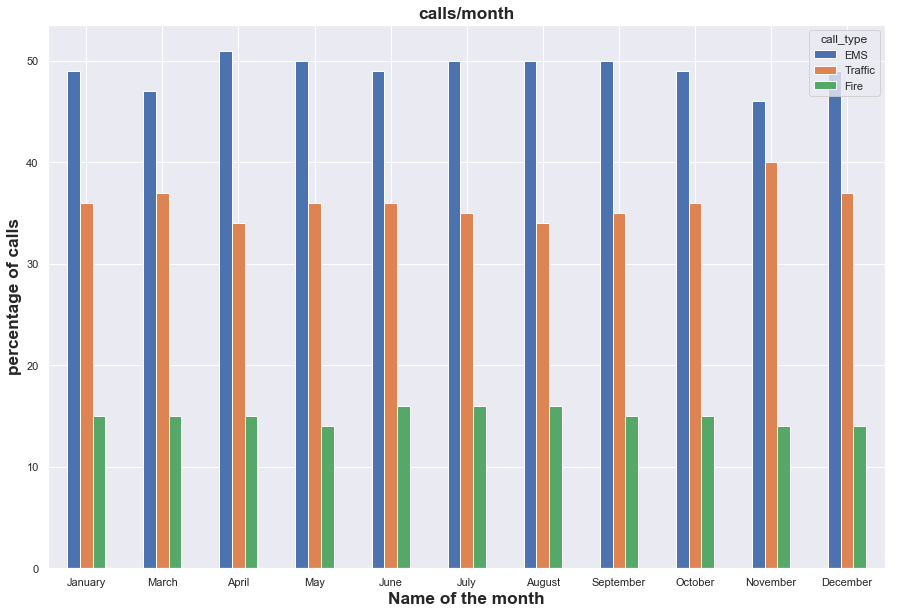

In [57]:
sns.set(rc={'figure.figsize':(15,10)})
percentage.unstack().plot(kind='bar')
plt.xlabel('Name of the month',fontdict=font)
plt.ylabel('percentage of calls',fontdict=font)
plt.xticks(rotation=0)
plt.title('calls/month',fontdict=font)

## Types of calls in Year

In [58]:
year_data = data.groupby(['year','call_type'])['call_type'].count()

In [59]:
year_data.head()

year  call_type
2015  EMS           3898
      Fire          1095
      Traffic       2923
2016  EMS          70127
      Fire         21577
Name: call_type, dtype: int64

In [60]:
year_data_percentage=year_data.groupby(level=0).apply(lambda x: round(100*x/float(x.sum())))

In [61]:
year_data_percentage.head()

year  call_type
2015  EMS          49.0
      Fire         14.0
      Traffic      37.0
2016  EMS          49.0
      Fire         15.0
Name: call_type, dtype: float64

In [62]:
year_data_percentage=year_data_percentage.reindex(['EMS','Traffic','Fire'],level=1)

In [63]:
year_data_percentage.head()

year  call_type
2015  EMS          49.0
      Traffic      37.0
      Fire         14.0
2016  EMS          49.0
      Traffic      36.0
Name: call_type, dtype: float64

Text(0.5, 1.0, 'calls/year')

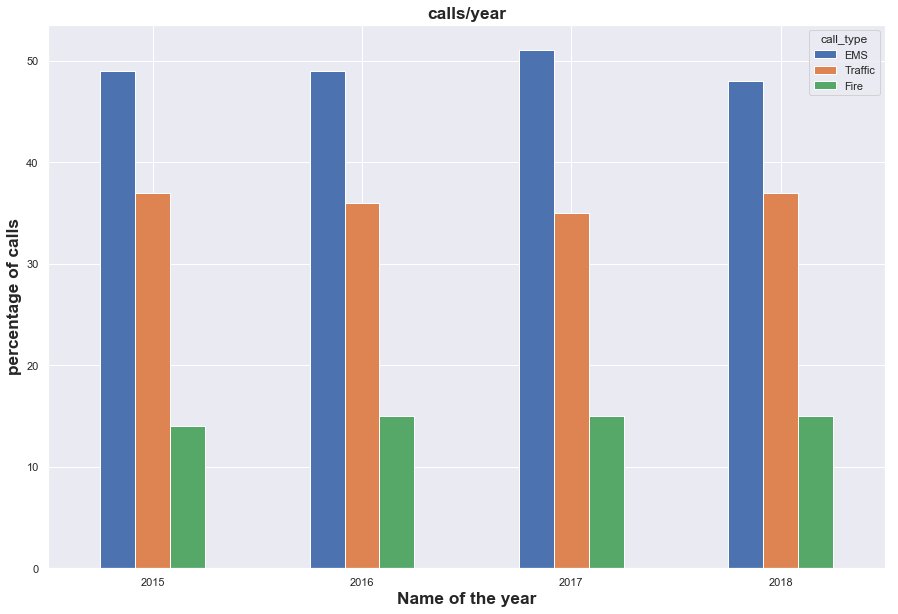

In [64]:
sns.set(rc={'figure.figsize':(15,10)})
year_data_percentage.unstack().plot(kind='bar')
plt.xlabel('Name of the year',fontdict=font)
plt.ylabel('percentage of calls',fontdict=font)
plt.xticks(rotation=0)
plt.title('calls/year',fontdict=font)

In [65]:
data.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,year,month,day,hour,emergency_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,Thursday,17,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,Thursday,17,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015,December,Thursday,14,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,December,Thursday,16,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,December,Thursday,16,DIZZINESS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,2015,December,Thursday,15,HEAD INJURY
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,2015,December,Thursday,16,NAUSEA/VOMITING
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,2015,December,Thursday,16,RESPIRATORY EMERGENCY
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,2015,December,Thursday,16,SYNCOPAL EPISODE
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,2015,December,Thursday,17,VEHICLE ACCIDENT -
